# Introduction 

This Jupyter Notebook contains the code used to produce the figures within the research article by Mangold-Döring et al. 2022 (https://doi.org/). 


## What is plotted here? 
For the model code that generated the predictions plotted below, see the MatLab code in the GitHub repository. 

## Why though? 
For additional information on the research, please refer to the original article and its supporting information: Mangold-Döring et al. (submitted to ES&T in 2022).

### You think this code is ugly? 
Well, that makes two of us. If you have time to clean it up, please consider to share your tidy version with the rest of us <3!

# Initial settings 
#### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

#### Define plot specifications

In [2]:
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False  #no line on the right side of the plot
mpl.rcParams['axes.spines.top'] = False    #no line on the top of the plot
mpl.rcParams['font.size'] = '15'           #define font size to 15

#### Define a class Experiment to simplify plotting 
The class Experiment contains slots for defining the experiment (i.e., chemical and model modification used)

In [3]:
class Experiment:
    def __init__(self, id_date, chemical, death_model, temperature_model, temperature, df_data, df_model):
        self.id_date           = id_date            # ID, date for respective analysis
        self.chemical          = chemical           # chemical used, IMI or FPF
        self.death_model       = death_model        # death model used, IT od SD
        self.temperature_model = temperature_model  # temperature model used, T1 or T2
        self.temperature       = temperature        # temperature, here, 7, 11, 15
        self.df_data           = df_data            # dataframe for experimental data
        self.df_model          = df_model           # dataframe for model data

#### Define initialization procedure to use class Experiment

In [4]:
def initialize_experiment(experiment):
    
    # compile filename
    filename_data  = experiment.id_date+"_"+experiment.chemical+"_GUTS_"+experiment.death_model+"_"+experiment.temperature_model+"_data_"+experiment.temperature+".txt"
    filename_model = experiment.id_date+"_"+experiment.chemical+"_GUTS_"+experiment.death_model+"_"+experiment.temperature_model+"_model_"+experiment.temperature+".txt"
    #print(filename_data)
    
    # read data from txt files based on filename
    data_array  = np.loadtxt(filename_data, delimiter=',', dtype=float)
    model_array = np.loadtxt(filename_model, delimiter=',', dtype=float)
    
    # convert imported array into df
    experiment.df_data = pd.DataFrame(data=data_array, 
                  columns=["time","D30","D10","D3","D1","D03","DC","DN30","DN10","DN3","DN1","DN03","DNC",
                        "DP30","DP10","DP3","DP1","DP03","DPC"])
    #print(df_data)
    experiment.df_model = pd.DataFrame(data=model_array, 
                  columns=["time","mod30","up30","low30","mod10","up10","low10","mod3","up3","low3",
                           "mod1","up1","low1","mod03","up03","low03","modC","upC","lowC"])
    
    return experiment


#### Define different objects for all experiment scenarios

In [5]:
#SD models
IMI_SD_T1_07 = Experiment("20220822", "IMI", "SD", "T1", "07", float('nan'), float('nan'))
IMI_SD_T1_11 = Experiment("20220822", "IMI", "SD", "T1", "11", float('nan'), float('nan'))
IMI_SD_T1_15 = Experiment("20220822", "IMI", "SD", "T1", "15", float('nan'), float('nan'))

IMI_SD_T2_07 = Experiment("20220822", "IMI", "SD", "T2", "07", float('nan'), float('nan'))
IMI_SD_T2_11 = Experiment("20220822", "IMI", "SD", "T2", "11", float('nan'), float('nan'))
IMI_SD_T2_15 = Experiment("20220822", "IMI", "SD", "T2", "15", float('nan'), float('nan'))

#IT models
IMI_IT_T1_07 = Experiment("20220822", "IMI", "IT", "T1", "07", float('nan'), float('nan'))
IMI_IT_T1_11 = Experiment("20220822", "IMI", "IT", "T1", "11", float('nan'), float('nan'))
IMI_IT_T1_15 = Experiment("20220822", "IMI", "SD", "T1", "15", float('nan'), float('nan'))

IMI_IT_T2_07 = Experiment("20220822", "IMI", "IT", "T2", "07", float('nan'), float('nan'))
IMI_IT_T2_11 = Experiment("20220822", "IMI", "IT", "T2", "11", float('nan'), float('nan'))
IMI_IT_T2_15 = Experiment("20220822", "IMI", "IT", "T2", "15", float('nan'), float('nan'))

In [6]:
#SD models
FPF_SD_T1_07 = Experiment("20220822", "FPF", "SD", "T1", "07", float('nan'), float('nan'))
FPF_SD_T1_11 = Experiment("20220822", "FPF", "SD", "T1", "11", float('nan'), float('nan'))
FPF_SD_T1_15 = Experiment("20220822", "FPF", "SD", "T1", "15", float('nan'), float('nan'))

FPF_SD_T2_07 = Experiment("20220822", "FPF", "SD", "T2", "07", float('nan'), float('nan'))
FPF_SD_T2_11 = Experiment("20220822", "FPF", "SD", "T2", "11", float('nan'), float('nan'))
FPF_SD_T2_15 = Experiment("20220822", "FPF", "SD", "T2", "15", float('nan'), float('nan'))

#IT models
FPF_IT_T1_07 = Experiment("20220822", "FPF", "IT", "T1", "07", float('nan'), float('nan'))
FPF_IT_T1_11 = Experiment("20220822", "FPF", "IT", "T1", "11", float('nan'), float('nan'))
FPF_IT_T1_15 = Experiment("20220822", "FPF", "SD", "T1", "15", float('nan'), float('nan'))

FPF_IT_T2_07 = Experiment("20220822", "FPF", "IT", "T2", "07", float('nan'), float('nan'))
FPF_IT_T2_11 = Experiment("20220822", "FPF", "IT", "T2", "11", float('nan'), float('nan'))
FPF_IT_T2_15 = Experiment("20220822", "FPF", "IT", "T2", "15", float('nan'), float('nan'))

#### Chose which scenarios to plot by defining the object models and initialize those experiments

In [12]:
#IMI models
# models = [IMI_SD_T1_07, IMI_SD_T2_07, IMI_SD_T1_11, IMI_SD_T2_11, IMI_SD_T1_15, IMI_SD_T2_15]
# models = [IMI_IT_T1_07, IMI_IT_T2_07, IMI_IT_T1_11, IMI_IT_T2_11, IMI_IT_T1_15, IMI_IT_T2_15]

# #FPF models
models = [FPF_SD_T1_07, FPF_SD_T2_07, FPF_SD_T1_11, FPF_SD_T2_11, FPF_SD_T1_15, FPF_SD_T2_15] 
# models = [FPF_IT_T1_07, FPF_IT_T2_07, FPF_IT_T1_11, FPF_IT_T2_11, FPF_IT_T1_15, FPF_IT_T2_15]

for x in models:
    initialize_experiment(x)


OSError: 20220822_FPF_GUTS_SD_T1_data_07.txt not found.

## Plot the defined scenarios

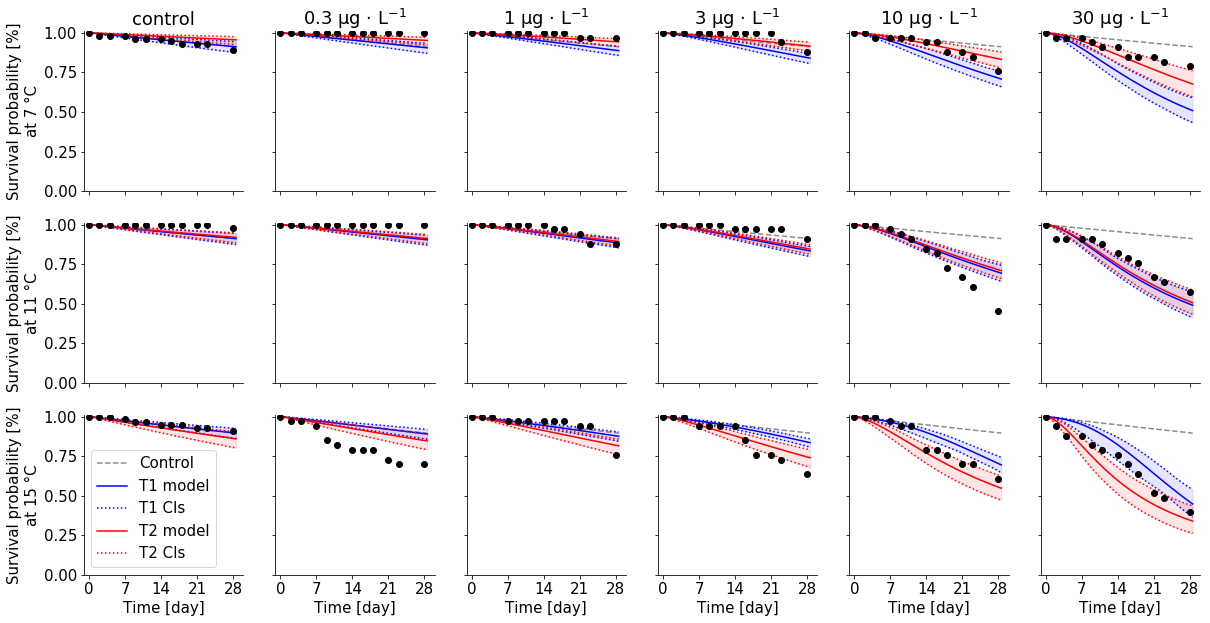

In [10]:
# plot
fig, ((ax1, ax2, ax3, ax4, ax5, ax6), 
      (ax7, ax8, ax9, ax10, ax11, ax12), 
      (ax13, ax14, ax15, ax16, ax17, ax18)) = plt.subplots(3, 6, ##defining the number of plots (row, columns)
                                                       sharex=True, sharey=True, 
                                                       figsize=(20,10))
# set coordinate limits
plt.xlim(-1,30)
plt.xticks(ticks=[0,7,14,21,28])
plt.ylim(0,1.01)
plt.rc('font', size=15)  

# Labels, titles and legend
ax1.set_ylabel(r'Survival probability [%]'
               '\n'  # Newline
               r'at 7 '+u'\u00B0'+'C')
ax7.set_ylabel(r'Survival probability [%]'
               '\n'  # Newline
               r'at 11 '+u'\u00B0'+'C')
ax13.set_ylabel(r'Survival probability [%]'
               '\n'  # Newline
               r'at 15 '+u'\u00B0'+'C')

ax13.set_xlabel('Time [day]')
ax14.set_xlabel('Time [day]')
ax15.set_xlabel('Time [day]')
ax16.set_xlabel('Time [day]')
ax17.set_xlabel('Time [day]')
ax18.set_xlabel('Time [day]')

ax1.set_title('control')
ax2.set_title('0.3 µg '+u"\u00B7"+' $\mathregular{L^{-1}}$')   
ax3.set_title('1 µg '+u"\u00B7"+' $\mathregular{L^{-1}}$')
ax4.set_title('3 µg '+u"\u00B7"+' $\mathregular{L^{-1}}$')
ax5.set_title('10 µg '+u"\u00B7"+' $\mathregular{L^{-1}}$')
ax6.set_title('30 µg '+u"\u00B7"+' $\mathregular{L^{-1}}$')

for x in models:

### 7 degrees models ######################################################################################################
###########################################################################################################################
    if x.temperature_model == "T1" and x.temperature == "07":
    
    # Raw data_07    
        ax1.errorbar(x.df_data.time, x.df_data.DC, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax2.errorbar(x.df_data.time, x.df_data.D03, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax3.errorbar(x.df_data.time, x.df_data.D1, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax4.errorbar(x.df_data.time, x.df_data.D3, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax5.errorbar(x.df_data.time, x.df_data.D10, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax6.errorbar(x.df_data.time, x.df_data.D30, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)       

    # Control model for T1 for all plots
        ax1.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax2.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax3.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax4.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax5.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax6.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 

    # T1_07     
        color = 'b'
        ## Controls
        ax1.plot(x.df_model.time, x.df_model.modC, color= color) 
        ax1.plot(x.df_model.time, x.df_model.upC, color= color, linestyle= ':') 
        ax1.plot(x.df_model.time, x.df_model.lowC, color= color, linestyle= ':')
        ax1.fill_between(x.df_model.time, x.df_model.upC, x.df_model.lowC, color= color, alpha = 0.1)
        ## 0.3 µg/L
        ax2.plot(x.df_model.time, x.df_model.mod03, color= color) 
        ax2.plot(x.df_model.time, x.df_model.up03, color= color, linestyle= ':') 
        ax2.plot(x.df_model.time, x.df_model.low03, color= color, linestyle= ':')
        ax2.fill_between(x.df_model.time, x.df_model.up03, x.df_model.low03, color= color, alpha = 0.1)
        ## 1 µg/L        
        ax3.plot(x.df_model.time, x.df_model.mod1, color= color) 
        ax3.plot(x.df_model.time, x.df_model.up1, color= color, linestyle= ':') 
        ax3.plot(x.df_model.time, x.df_model.low1, color= color, linestyle= ':')
        ax3.fill_between(x.df_model.time, x.df_model.up1, x.df_model.low1, color= color, alpha = 0.1)
        ## 3 µg/L
        ax4.plot(x.df_model.time, x.df_model.mod3, color= color) 
        ax4.plot(x.df_model.time, x.df_model.up3, color= color, linestyle= ':') 
        ax4.plot(x.df_model.time, x.df_model.low3, color= color, linestyle= ':')
        ax4.fill_between(x.df_model.time, x.df_model.up3, x.df_model.low3, color= color, alpha = 0.1)         
        ## 10 µg/L               
        ax5.plot(x.df_model.time, x.df_model.mod10, color= color) 
        ax5.plot(x.df_model.time, x.df_model.up10, color= color, linestyle= ':') 
        ax5.plot(x.df_model.time, x.df_model.low10, color= color, linestyle= ':')
        ax5.fill_between(x.df_model.time, x.df_model.up10, x.df_model.low10, color= color, alpha = 0.1)                        
        ## 30 µg/L
        ax6.plot(x.df_model.time, x.df_model.mod30, color= color) 
        ax6.plot(x.df_model.time, x.df_model.up30, color= color, linestyle= ':') 
        ax6.plot(x.df_model.time, x.df_model.low30, color= color, linestyle= ':')
        ax6.fill_between(x.df_model.time, x.df_model.up30, x.df_model.low30, color= color, alpha = 0.1)                          
                     
                     
# T2_07
    elif x.temperature_model == "T2" and x.temperature == "07": 
        color = 'r'
        ## Controls
        ax1.plot(x.df_model.time, x.df_model.modC, color= color) 
        ax1.plot(x.df_model.time, x.df_model.upC, color= color, linestyle= ':') 
        ax1.plot(x.df_model.time, x.df_model.lowC, color= color, linestyle= ':')
        ax1.fill_between(x.df_model.time, x.df_model.upC, x.df_model.lowC, color= color, alpha = 0.1)
        ## 0.3 µg/L
        ax2.plot(x.df_model.time, x.df_model.mod03, color= color) 
        ax2.plot(x.df_model.time, x.df_model.up03, color= color, linestyle= ':') 
        ax2.plot(x.df_model.time, x.df_model.low03, color= color, linestyle= ':')
        ax2.fill_between(x.df_model.time, x.df_model.up03, x.df_model.low03, color= color, alpha = 0.1)
        ## 1 µg/L        
        ax3.plot(x.df_model.time, x.df_model.mod1, color= color) 
        ax3.plot(x.df_model.time, x.df_model.up1, color= color, linestyle= ':') 
        ax3.plot(x.df_model.time, x.df_model.low1, color= color, linestyle= ':')
        ax3.fill_between(x.df_model.time, x.df_model.up1, x.df_model.low1, color= color, alpha = 0.1)
        ## 3 µg/L
        ax4.plot(x.df_model.time, x.df_model.mod3, color= color) 
        ax4.plot(x.df_model.time, x.df_model.up3, color= color, linestyle= ':') 
        ax4.plot(x.df_model.time, x.df_model.low3, color= color, linestyle= ':')
        ax4.fill_between(x.df_model.time, x.df_model.up3, x.df_model.low3, color= color, alpha = 0.1)         
        ## 10 µg/L               
        ax5.plot(x.df_model.time, x.df_model.mod10, color= color) 
        ax5.plot(x.df_model.time, x.df_model.up10, color= color, linestyle= ':') 
        ax5.plot(x.df_model.time, x.df_model.low10, color= color, linestyle= ':')
        ax5.fill_between(x.df_model.time, x.df_model.up10, x.df_model.low10, color= color, alpha = 0.1)                        
        ## 30 µg/L
        ax6.plot(x.df_model.time, x.df_model.mod30, color= color) 
        ax6.plot(x.df_model.time, x.df_model.up30, color= color, linestyle= ':') 
        ax6.plot(x.df_model.time, x.df_model.low30, color= color, linestyle= ':')
        ax6.fill_between(x.df_model.time, x.df_model.up30, x.df_model.low30, color= color, alpha = 0.1) 

    ### 11 degrees models ######################################################################################################
    ###########################################################################################################################
    elif x.temperature_model == "T1" and x.temperature == "11":
    # Raw data_11   
        ax7.errorbar(x.df_data.time, x.df_data.DC, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax8.errorbar(x.df_data.time, x.df_data.D03, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax9.errorbar(x.df_data.time, x.df_data.D1, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax10.errorbar(x.df_data.time, x.df_data.D3, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax11.errorbar(x.df_data.time, x.df_data.D10, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax12.errorbar(x.df_data.time, x.df_data.D30, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)       

    # Control model for T1 for all plots
        ax7.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax8.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax9.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax10.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax11.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax12.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 

    # T1_11     
        color = 'b'
        ## Controls
        ax7.plot(x.df_model.time, x.df_model.modC, color= color) 
        ax7.plot(x.df_model.time, x.df_model.upC, color= color, linestyle= ':') 
        ax7.plot(x.df_model.time, x.df_model.lowC, color= color, linestyle= ':')
        ax7.fill_between(x.df_model.time, x.df_model.upC, x.df_model.lowC, color= color, alpha = 0.1)
        ## 0.3 µg/L
        ax8.plot(x.df_model.time, x.df_model.mod03, color= color) 
        ax8.plot(x.df_model.time, x.df_model.up03, color= color, linestyle= ':') 
        ax8.plot(x.df_model.time, x.df_model.low03, color= color, linestyle= ':')
        ax8.fill_between(x.df_model.time, x.df_model.up03, x.df_model.low03, color= color, alpha = 0.1)
        ## 1 µg/L        
        ax9.plot(x.df_model.time, x.df_model.mod1, color= color) 
        ax9.plot(x.df_model.time, x.df_model.up1, color= color, linestyle= ':') 
        ax9.plot(x.df_model.time, x.df_model.low1, color= color, linestyle= ':')
        ax9.fill_between(x.df_model.time, x.df_model.up1, x.df_model.low1, color= color, alpha = 0.1)
        ## 3 µg/L
        ax10.plot(x.df_model.time, x.df_model.mod3, color= color) 
        ax10.plot(x.df_model.time, x.df_model.up3, color= color, linestyle= ':') 
        ax10.plot(x.df_model.time, x.df_model.low3, color= color, linestyle= ':')
        ax10.fill_between(x.df_model.time, x.df_model.up3, x.df_model.low3, color= color, alpha = 0.1)         
        ## 10 µg/L               
        ax11.plot(x.df_model.time, x.df_model.mod10, color= color) 
        ax11.plot(x.df_model.time, x.df_model.up10, color= color, linestyle= ':') 
        ax11.plot(x.df_model.time, x.df_model.low10, color= color, linestyle= ':')
        ax11.fill_between(x.df_model.time, x.df_model.up10, x.df_model.low10, color= color, alpha = 0.1)                        
        ## 30 µg/L
        ax12.plot(x.df_model.time, x.df_model.mod30, color= color) 
        ax12.plot(x.df_model.time, x.df_model.up30, color= color, linestyle= ':') 
        ax12.plot(x.df_model.time, x.df_model.low30, color= color, linestyle= ':')
        ax12.fill_between(x.df_model.time, x.df_model.up30, x.df_model.low30, color= color, alpha = 0.1)                          


    # T2_11
    elif x.temperature_model == "T2" and x.temperature == "11": 
        color = 'r'
        ## Controls
        ax7.plot(x.df_model.time, x.df_model.modC, color= color) 
        ax7.plot(x.df_model.time, x.df_model.upC, color= color, linestyle= ':') 
        ax7.plot(x.df_model.time, x.df_model.lowC, color= color, linestyle= ':')
        ax7.fill_between(x.df_model.time, x.df_model.upC, x.df_model.lowC, color= color, alpha = 0.1)
        ## 0.3 µg/L
        ax8.plot(x.df_model.time, x.df_model.mod03, color= color) 
        ax8.plot(x.df_model.time, x.df_model.up03, color= color, linestyle= ':') 
        ax8.plot(x.df_model.time, x.df_model.low03, color= color, linestyle= ':')
        ax8.fill_between(x.df_model.time, x.df_model.up03, x.df_model.low03, color= color, alpha = 0.1)
        ## 1 µg/L        
        ax9.plot(x.df_model.time, x.df_model.mod1, color= color) 
        ax9.plot(x.df_model.time, x.df_model.up1, color= color, linestyle= ':') 
        ax9.plot(x.df_model.time, x.df_model.low1, color= color, linestyle= ':')
        ax9.fill_between(x.df_model.time, x.df_model.up1, x.df_model.low1, color= color, alpha = 0.1)
        ## 3 µg/L
        ax10.plot(x.df_model.time, x.df_model.mod3, color= color) 
        ax10.plot(x.df_model.time, x.df_model.up3, color= color, linestyle= ':') 
        ax10.plot(x.df_model.time, x.df_model.low3, color= color, linestyle= ':')
        ax10.fill_between(x.df_model.time, x.df_model.up3, x.df_model.low3, color= color, alpha = 0.1)         
        ## 10 µg/L               
        ax11.plot(x.df_model.time, x.df_model.mod10, color= color) 
        ax11.plot(x.df_model.time, x.df_model.up10, color= color, linestyle= ':') 
        ax11.plot(x.df_model.time, x.df_model.low10, color= color, linestyle= ':')
        ax11.fill_between(x.df_model.time, x.df_model.up10, x.df_model.low10, color= color, alpha = 0.1)                        
        ## 30 µg/L
        ax12.plot(x.df_model.time, x.df_model.mod30, color= color) 
        ax12.plot(x.df_model.time, x.df_model.up30, color= color, linestyle= ':') 
        ax12.plot(x.df_model.time, x.df_model.low30, color= color, linestyle= ':')
        ax12.fill_between(x.df_model.time, x.df_model.up30, x.df_model.low30, color= color, alpha = 0.1) 

    ### 15 degrees models ######################################################################################################
    ###########################################################################################################################
    elif x.temperature_model == "T1" and x.temperature == "15":
    # Raw data_15    
        ax13.errorbar(x.df_data.time, x.df_data.DC, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2, label = '_nolegend_')
        ax14.errorbar(x.df_data.time, x.df_data.D03, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax15.errorbar(x.df_data.time, x.df_data.D1, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax16.errorbar(x.df_data.time, x.df_data.D3, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax17.errorbar(x.df_data.time, x.df_data.D10, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)
        ax18.errorbar(x.df_data.time, x.df_data.D30, color= 'k', fmt='o', ecolor='k', capsize=3, capthick=2)       

    # Control model for T1 for all plots
        ax13.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--', label ='Control') 
        ax14.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax15.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax16.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax17.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 
        ax18.plot(x.df_model.time, x.df_model.modC, color= '0.55', linestyle= '--') 

    # T1_15   
        color = 'b'
        ## Controls
        ax13.plot(x.df_model.time, x.df_model.modC, color= color, label ='T1 model') 
        ax13.plot(x.df_model.time, x.df_model.upC, color= color, linestyle= ':', label ='T1 CIs') 
        ax13.plot(x.df_model.time, x.df_model.lowC, color= color, linestyle= ':', label = '_nolegend_')
        ax13.fill_between(x.df_model.time, x.df_model.upC, x.df_model.lowC, color= color, alpha = 0.1)
        ## 0.3 µg/L
        ax14.plot(x.df_model.time, x.df_model.mod03, color= color) 
        ax14.plot(x.df_model.time, x.df_model.up03, color= color, linestyle= ':') 
        ax14.plot(x.df_model.time, x.df_model.low03, color= color, linestyle= ':')
        ax14.fill_between(x.df_model.time, x.df_model.up03, x.df_model.low03, color= color, alpha = 0.1)
        ## 1 µg/L        
        ax15.plot(x.df_model.time, x.df_model.mod1, color= color) 
        ax15.plot(x.df_model.time, x.df_model.up1, color= color, linestyle= ':') 
        ax15.plot(x.df_model.time, x.df_model.low1, color= color, linestyle= ':')
        ax15.fill_between(x.df_model.time, x.df_model.up1, x.df_model.low1, color= color, alpha = 0.1)
        ## 3 µg/L
        ax16.plot(x.df_model.time, x.df_model.mod3, color= color) 
        ax16.plot(x.df_model.time, x.df_model.up3, color= color, linestyle= ':') 
        ax16.plot(x.df_model.time, x.df_model.low3, color= color, linestyle= ':')
        ax16.fill_between(x.df_model.time, x.df_model.up3, x.df_model.low3, color= color, alpha = 0.1)         
        ## 10 µg/L               
        ax17.plot(x.df_model.time, x.df_model.mod10, color= color) 
        ax17.plot(x.df_model.time, x.df_model.up10, color= color, linestyle= ':') 
        ax17.plot(x.df_model.time, x.df_model.low10, color= color, linestyle= ':')
        ax17.fill_between(x.df_model.time, x.df_model.up10, x.df_model.low10, color= color, alpha = 0.1)                        
        ## 30 µg/L
        ax18.plot(x.df_model.time, x.df_model.mod30, color= color) 
        ax18.plot(x.df_model.time, x.df_model.up30, color= color, linestyle= ':') 
        ax18.plot(x.df_model.time, x.df_model.low30, color= color, linestyle= ':')
        ax18.fill_between(x.df_model.time, x.df_model.up30, x.df_model.low30, color= color, alpha = 0.1)                          


    # T2_15
    elif x.temperature_model == "T2" and x.temperature == "15": 
        color = 'r'
        ## Controls
        ax13.plot(x.df_model.time, x.df_model.modC, color= color, label ='T2 model') 
        ax13.plot(x.df_model.time, x.df_model.upC, color= color, linestyle= ':', label ='T2 CIs') 
        ax13.plot(x.df_model.time, x.df_model.lowC, color= color, linestyle= ':', label = '_nolegend_')
        ax13.fill_between(x.df_model.time, x.df_model.upC, x.df_model.lowC, color= color, alpha = 0.1)
        ## 0.3 µg/L
        ax14.plot(x.df_model.time, x.df_model.mod03, color= color) 
        ax14.plot(x.df_model.time, x.df_model.up03, color= color, linestyle= ':') 
        ax14.plot(x.df_model.time, x.df_model.low03, color= color, linestyle= ':')
        ax14.fill_between(x.df_model.time, x.df_model.up03, x.df_model.low03, color= color, alpha = 0.1)
        ## 1 µg/L        
        ax15.plot(x.df_model.time, x.df_model.mod1, color= color) 
        ax15.plot(x.df_model.time, x.df_model.up1, color= color, linestyle= ':') 
        ax15.plot(x.df_model.time, x.df_model.low1, color= color, linestyle= ':')
        ax15.fill_between(x.df_model.time, x.df_model.up1, x.df_model.low1, color= color, alpha = 0.1)
        ## 3 µg/L
        ax16.plot(x.df_model.time, x.df_model.mod3, color= color) 
        ax16.plot(x.df_model.time, x.df_model.up3, color= color, linestyle= ':') 
        ax16.plot(x.df_model.time, x.df_model.low3, color= color, linestyle= ':')
        ax16.fill_between(x.df_model.time, x.df_model.up3, x.df_model.low3, color= color, alpha = 0.1)         
        ## 10 µg/L               
        ax17.plot(x.df_model.time, x.df_model.mod10, color= color) 
        ax17.plot(x.df_model.time, x.df_model.up10, color= color, linestyle= ':') 
        ax17.plot(x.df_model.time, x.df_model.low10, color= color, linestyle= ':')
        ax17.fill_between(x.df_model.time, x.df_model.up10, x.df_model.low10, color= color, alpha = 0.1)                        
        ## 30 µg/L
        ax18.plot(x.df_model.time, x.df_model.mod30, color= color) 
        ax18.plot(x.df_model.time, x.df_model.up30, color= color, linestyle= ':') 
        ax18.plot(x.df_model.time, x.df_model.low30, color= color, linestyle= ':')
        ax18.fill_between(x.df_model.time, x.df_model.up30, x.df_model.low30, color= color, alpha = 0.1)    
    # Add legend    
        ax13.legend(loc = 3)       

    
                      
# plt.savefig("20220823_FPF_GUTS_IT.pdf")
# plt.savefig("20220823_FPF_GUTS_IT.svg")